# Example usage of trainer class

In [1]:
# autoreload after code has changed
%load_ext autoreload
%autoreload 2

In [2]:
import os

# move into the correct dirrectory, e.g. move up one directory level iif this cell is run for the first time
try:
    a = first_time
except NameError:
    print("Running first time, moving up one dir level")
    os.chdir('..')  # Move up one directory level to the root directory of project
    first_time = False

print("This path should be the root directory of the project: ", os.getcwd())
    


Running first time, moving up one dir level
This path should be the root directory of the project:  /home/daniels/Documents/uni/ADLR/tum-adlr-02


## Define Dataset
Creating the dataset object and applzing transformations to the data.

In [5]:
from data.model_classes import Mug, Bottle
from data.dataconverter import DataConverter

# generate data
dataconverter = DataConverter(
    classes=[Mug(),Bottle()],
    min_order = 1, #small parameter amounts for testing
    tact_order = 2,
    rand_rotations=2
    
)
# set regenerate to true, if you run this after changes in dataconverter have been made
dataconverter.generate_2d_dataset(show_results=False, regenerate=False)


Download complete. Extracting files...
Extraction complete.
Download complete. Extracting files...
Extraction complete.


Class bottle: 100%|███████████████████████████| 498/498 [03:27<00:00,  2.40it/s]


Generating annotation CSV files for training and testing with a split ratio of 0.9:0.1.
Finished generating annotation CSV files for 28480 different shapes.


In [8]:
from data.reconstruction_dataset import *

csv_file = './datasets/2D_shapes/annotations.csv'
root_dir = './datasets/2D_shapes'
#composed = transforms.Compose([RandomOrientation(),
#                               ToTensor()])

dataset = ReconstructionDataset(csv_file=csv_file,
                                root_dir=root_dir)#,
                                #transform=composed)

Examplary data pairs:

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


<Figure size 640x480 with 0 Axes>

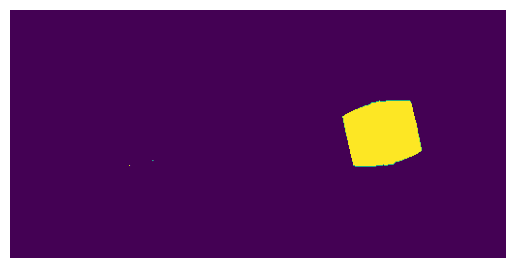

In [9]:
example_data = dataset[5]

plt.figure()
print(example_data['image'])
show_datapair(example_data['image'], example_data['label'])
plt.show()

## Choose Hyperparamters

Look into the file neural_nets.trainer to see which hyperparameters you can choose.
The seperation into tunable and non tunable hyperparameters is made, because this makes parameter searches with ray easier.


#### Non Tunable Hyperparameters


In [12]:
from neural_nets.trainer import NonTHparams


nt_h = NonTHparams()
nt_h.num_epochs = 50
nt_h.train_prop = 0.9

nt_h.log_train_period = 100
nt_h.log_val_freq = 1


#### Tunable Hyperparameters

In [ ]:
import torch.nn as nn
import torch.optim as optim

from neural_nets.trainer import THparams
from neural_nets.weight_inits import weight_init_kx
from neural_nets.models.unet import UNet2


t_h = THparams()
t_h.batch_size = 16

t_h.model = UNet2
t_h.weight_init = weight_init_kx
t_h.depth = 2#5
t_h.channels = 3#64
t_h.first_kernel_size = 41

t_h.lr = 1e-4
t_h.optimizer = optim.Adam
t_h.loss_func = nn.BCELoss()




## Initialize Trainer

In [ ]:
from neural_nets.trainer import Trainer

trainer = Trainer(nt_h,t_h, dataset)



## Training

In [ ]:
trainer.train()